# Data Analysis

## Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
import seaborn as sns

---

## Step 1 : Data Cleaning

You have collected your data! So it's time to do a cleaning on it. A cleaned dataset is a dataset that doesn't contain any duplicates, is blank spaces or error-free. The rest of the analysis can be discarded if you neglect this step!

- No duplicates
- No blank spaces (ex: `" I love python "` => `"I love python"`)
- No errors
- No empty values


## Put the data into a table

In [ ]:
df = pd.read_csv('csvfile.csv')
df

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969.0,Belgium,Brugge,NaN,NaN,NaN,NaN,...,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6.0,13,1920.0,Belgium,Tournai,NaN,NaN,0.0,NaN,...,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,...,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1.0,4,NaN,Belgium,Veurne,NaN,NaN,NaN,1.0,...,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118709,https://www.immoweb.be/en/classified/house/for...,1.0,3,2024.0,Belgium,Gent,NaN,NaN,NaN,1.0,...,4.0,NaN,GOOD,house,234.0,NaN,NaN,0.0,1,residential_sale
118710,https://www.immoweb.be/en/classified/house/for...,4.0,4,NaN,Belgium,Antwerp,NaN,NaN,0.0,NaN,...,NaN,NaN,JUST_RENOVATED,apartment_block,202.0,NaN,NaN,NaN,1,residential_sale
118711,https://www.immoweb.be/en/classified/apartment...,1.0,2,NaN,Belgium,Antwerp,NaN,NON_FLOOD_ZONE,NaN,NaN,...,NaN,NaN,GOOD,apartment,NaN,0.0,1.0,1.0,2,residential_sale
118712,https://www.immoweb.be/en/classified/apartment...,1.0,2,NaN,Belgium,Brugge,NaN,POSSIBLE_FLOOD_ZONE,NaN,NaN,...,8.0,NaN,NaN,apartment,NaN,NaN,1.0,NaN,2,residential_sale


---

## Replace missing values



In [ ]:

def no_null(df):    
    missing_percentage = df.isnull().mean() * 100

    for i in df.columns:
        if pd.api.types.is_bool_dtype(df[i]):
            df[i] = df[i].fillna(False)
        elif pd.api.types.is_integer_dtype(df[i]):
            df[i] = df[i].fillna(0)
        elif pd.api.types.is_float_dtype(df[i]):
            df[i] = df[i].fillna(0)
            df[i] = df[i].astype(int)
        else:
            df[i] = df[i].fillna("Unknown")
            
    return df, missing_percentage

not_nulled = no_null(df)
df = not_nulled[0]
df

print("Value missing :")
print(not_nulled[1])


,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Belgium,Brugge,0,Unknown,0,0,...,1,0,GOOD,flat_studio,0,0,1,1,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Belgium,Tournai,0,Unknown,0,0,...,31,0,GOOD,apartment_block,130,0,0,5,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,...,0,0,GOOD,house,0,0,0,2,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1,4,0,Belgium,Veurne,0,Unknown,0,1,...,0,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,...,1,0,AS_NEW,apartment,0,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118709,https://www.immoweb.be/en/classified/house/for...,1,3,2024,Belgium,Gent,0,Unknown,0,1,...,4,0,GOOD,house,234,0,0,0,1,residential_sale
118710,https://www.immoweb.be/en/classified/house/for...,4,4,0,Belgium,Antwerp,0,Unknown,0,0,...,0,0,JUST_RENOVATED,apartment_block,202,0,0,0,1,residential_sale
118711,https://www.immoweb.be/en/classified/apartment...,1,2,0,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,0,...,0,0,GOOD,apartment,0,0,1,1,2,residential_sale
118712,https://www.immoweb.be/en/classified/apartment...,1,2,0,Belgium,Brugge,0,POSSIBLE_FLOOD_ZONE,0,0,...,8,0,Unknown,apartment,0,0,1,0,2,residential_sale


---

## Drop Columns


In [18]:
df=df.drop(columns=['Country', 'Province', 'Region'])

---

## Drop Duplicates


In [19]:
df=df.drop_duplicates(subset=['BedroomCount','District','Price','Garden','GardenArea','RoomCount','SurfaceOfPlot','TypeOfSale'], keep='first')
df


,Url,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,0,Unknown,0,0,0,...,1,0,GOOD,flat_studio,0,0,1,1,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Tournai,0,Unknown,0,0,0,...,31,0,GOOD,apartment_block,130,0,0,5,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,0,NON_FLOOD_ZONE,1,0,0,...,0,0,GOOD,house,0,0,0,2,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1,4,0,Veurne,0,Unknown,0,1,1,...,0,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Hasselt,0,NON_FLOOD_ZONE,0,0,0,...,1,0,AS_NEW,apartment,0,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118704,https://www.immoweb.be/en/classified/house/for...,3,7,0,Tournai,0,Unknown,0,0,0,...,0,0,GOOD,house,6710,0,1,2,1,residential_sale
118706,https://www.immoweb.be/en/classified/apartment...,1,1,1971,Mouscron,0,Unknown,0,0,0,...,0,1,GOOD,apartment,0,0,0,1,2,residential_monthly_rent
118707,https://www.immoweb.be/en/classified/house/for...,0,0,0,Kortrijk,0,NON_FLOOD_ZONE,0,1,1,...,0,0,TO_RENOVATE,farmhouse,10703,0,0,0,1,residential_sale
118708,https://www.immoweb.be/en/classified/apartment...,1,1,2017,Tongeren,0,Unknown,0,0,0,...,0,0,GOOD,service_flat,0,0,1,1,2,residential_sale


---

## No blank spaces


In [20]:
for i in df.columns:
    df[i] = df[i].apply(lambda x: x.strip() if isinstance(x, str) else x)
df

,Url,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,0,Unknown,0,0,0,...,1,0,GOOD,flat_studio,0,0,1,1,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Tournai,0,Unknown,0,0,0,...,31,0,GOOD,apartment_block,130,0,0,5,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,0,NON_FLOOD_ZONE,1,0,0,...,0,0,GOOD,house,0,0,0,2,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1,4,0,Veurne,0,Unknown,0,1,1,...,0,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Hasselt,0,NON_FLOOD_ZONE,0,0,0,...,1,0,AS_NEW,apartment,0,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118704,https://www.immoweb.be/en/classified/house/for...,3,7,0,Tournai,0,Unknown,0,0,0,...,0,0,GOOD,house,6710,0,1,2,1,residential_sale
118706,https://www.immoweb.be/en/classified/apartment...,1,1,1971,Mouscron,0,Unknown,0,0,0,...,0,1,GOOD,apartment,0,0,0,1,2,residential_monthly_rent
118707,https://www.immoweb.be/en/classified/house/for...,0,0,0,Kortrijk,0,NON_FLOOD_ZONE,0,1,1,...,0,0,TO_RENOVATE,farmhouse,10703,0,0,0,1,residential_sale
118708,https://www.immoweb.be/en/classified/apartment...,1,1,2017,Tongeren,0,Unknown,0,0,0,...,0,0,GOOD,service_flat,0,0,1,1,2,residential_sale


---

## Remove outliers


In [21]:
df['NumberOfFacades'] = df['NumberOfFacades'].apply(lambda x: 4 if x >= 4 else x)

df_filtered = df[
    (df['PostalCode'] >= 1000) & (df['PostalCode'] <= 9999) &
    (df['Price'] > 0) & (df['Price'] < 15000000) &  
    (df['LivingArea'] > 0) & (df['LivingArea'] < 10000) &
    (df['BathroomCount'] <= df['BedroomCount']) &
    (df['ConstructionYear'] <= datetime.date.today().year + 10) &
    (df['NumberOfFacades'] <= 4) &
    (df['ShowerCount'] <= df['BathroomCount']) &
    (df['TypeOfSale'] != "annuity_monthly_amount") &
    (df['TypeOfSale'] != "annuity_without_lump_sum") &
    (df['TypeOfSale'] != "annuity_lump_sum")
]

# df.drop(df[df.ConstructionYear > 2033].index,inplace=True) masi nous c'est 2035 je sais pas si ca change
# df.drop(df[df.GardenArea > df.SurfaceOfPlot].index,inplace=True) on a pas cette ligne

# df.drop(df[df.PostalCode < 1000].index,inplace=True) on a mieux on a verfier aussi Les cp > 9999

#df.drop(df[df.NumberOfFacades > 4].index,inplace=True) on drop plus les > a 4 mais on garde et on les places das les 4

# df.drop(df[df.ToiletCount > 58].index,inplace=True) on a ni le premier ni le deuxieme
# df.drop(df[df.ShowerCount > 58].index,inplace=True)

df_filtered['TypeOfSale'] = df_filtered['TypeOfSale'].replace('residential_sale', 1)
df_filtered['TypeOfSale'] = df_filtered['TypeOfSale'].replace('residential_monthly_rent', 2)
        

df

C:\Users\HP-Omen\AppData\Local\Temp\ipykernel_14648\819335589.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TypeOfSale'] = df['TypeOfSale'].replace('residential_monthly_rent', 2)


,Url,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,0,Unknown,0,0,0,...,1,0,GOOD,flat_studio,0,0,1,1,2,1
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Tournai,0,Unknown,0,0,0,...,31,0,GOOD,apartment_block,130,0,0,5,1,1
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,0,NON_FLOOD_ZONE,1,0,0,...,0,0,GOOD,house,0,0,0,2,1,1
3,https://www.immoweb.be/en/classified/house/for...,1,4,0,Veurne,0,Unknown,0,1,1,...,0,0,TO_BE_DONE_UP,house,170,0,1,2,1,1
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Hasselt,0,NON_FLOOD_ZONE,0,0,0,...,1,0,AS_NEW,apartment,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118704,https://www.immoweb.be/en/classified/house/for...,3,7,0,Tournai,0,Unknown,0,0,0,...,0,0,GOOD,house,6710,0,1,2,1,1
118706,https://www.immoweb.be/en/classified/apartment...,1,1,1971,Mouscron,0,Unknown,0,0,0,...,0,1,GOOD,apartment,0,0,0,1,2,2
118707,https://www.immoweb.be/en/classified/house/for...,0,0,0,Kortrijk,0,NON_FLOOD_ZONE,0,1,1,...,0,0,TO_RENOVATE,farmhouse,10703,0,0,0,1,1
118708,https://www.immoweb.be/en/classified/apartment...,1,1,2017,Tongeren,0,Unknown,0,0,0,...,0,0,GOOD,service_flat,0,0,1,1,2,1



### Step 2 : Data Analysis

Now that the data has been collected and cleaned, it is time for the analysis. How many variables and inputs do you have? And so on...

Use the tools such as `matplotlib`/`seaborn`/`plotly`!

In [22]:

print("======================")
print(f"Nb of line : {len(df.index)}")
print(f"Nb of columns : {len(df.columns)}")
print("======================")

Nb of line : 78313
Nb of columns : 29


### Price by Construction Year

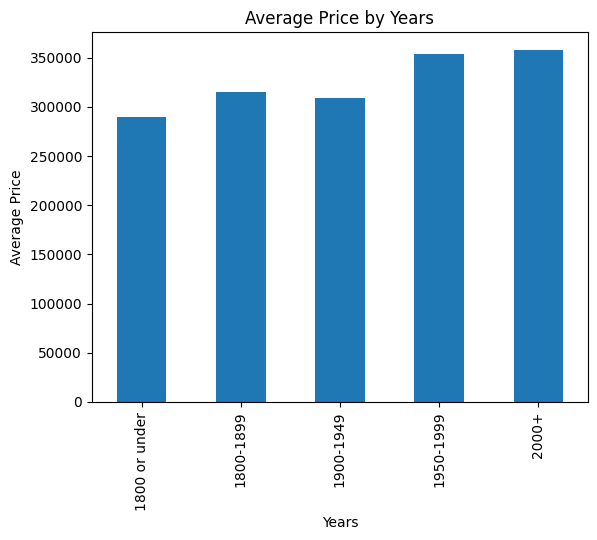

In [23]:
def categorize_construction_year(years):
    categories=[]
    for year in years:
        if year < 1800:
            categories.append('1800 or under')
        elif year >= 1800 and year < 1900:
            categories.append('1800-1899')
        elif year >= 1900 and year < 1950:
            categories.append('1900-1949')
        elif year >= 1950 and year < 2000:
            categories.append('1950-1999')
        else:
            categories.append('2000+')
    return categories
    
df['YearCategory'] = categorize_construction_year(df['ConstructionYear'])
df.groupby("YearCategory")['Price'].median().sort_index().plot(kind='bar') 

plt.xlabel('Years')
plt.ylabel('Average Price')
plt.title('Average Price by Years')
plt.show()




---

### Price by Number of Bedrooms


In [24]:
"""def categorize_number_bedrooms(bedrooms):
    categories=[]
    for bedroom_count in bedrooms:
        if bedroom_count >= 0 and bedroom_count <= 2:
            categories.append('2 Bedrooms or less')
        elif bedroom_count >= 3 and bedroom_count <= 5:
            categories.append('3 to 5 Bedrooms')
        elif bedroom_count >= 6 and bedroom_count <= 10:
            categories.append('6 to 10 Bedrooms')
        elif bedroom_count >= 11 and bedroom_count <= 20:
            categories.append('Between 11 and 20')
        else:
            categories.append('More than 20')
    return categories
    
df['BedroomsCategory'] = categorize_number_bedrooms(df['BedroomCount'])
df.groupby("BedroomsCategory")['Price'].median().sort_index().plot(kind='bar') 

plt.xlabel('Years')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')
plt.show()
"""




'def categorize_number_bedrooms(bedrooms):\n    categories=[]\n    for bedroom_count in bedrooms:\n        if bedroom_count >= 0 and bedroom_count <= 2:\n            categories.append(\'2 Bedrooms or less\')\n        elif bedroom_count >= 3 and bedroom_count <= 5:\n            categories.append(\'3 to 5 Bedrooms\')\n        elif bedroom_count >= 6 and bedroom_count <= 10:\n            categories.append(\'6 to 10 Bedrooms\')\n        elif bedroom_count >= 11 and bedroom_count <= 20:\n            categories.append(\'Between 11 and 20\')\n        else:\n            categories.append(\'More than 20\')\n    return categories\n    \ndf[\'BedroomsCategory\'] = categorize_number_bedrooms(df[\'BedroomCount\'])\ndf.groupby("BedroomsCategory")[\'Price\'].median().sort_index().plot(kind=\'bar\') \n\nplt.xlabel(\'Years\')\nplt.ylabel(\'Average Price\')\nplt.title(\'Average Price by Number of Bedrooms\')\nplt.show()\n'

--- 

### Price by Areas

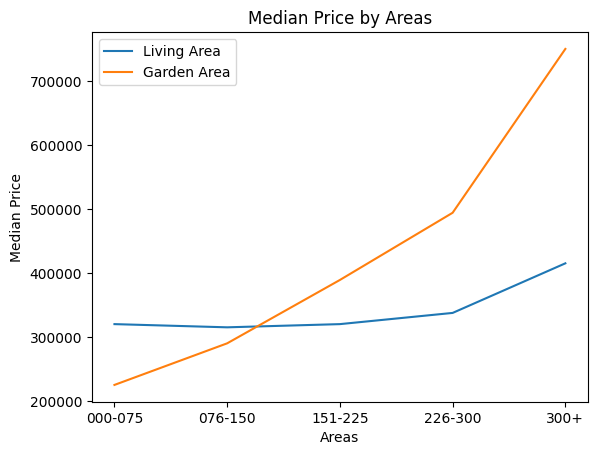

In [25]:
def categorize_livingArea(livingArea):
    categories=[]
    for area_count in livingArea:
        if area_count >= 0 and area_count <= 75:
            categories.append('000-075')
        elif area_count >= 76 and area_count <= 150:
            categories.append('076-150')
        elif area_count >= 151 and area_count <= 225:
            categories.append('151-225')
        elif area_count >= 226 and area_count <= 300:
            categories.append('226-300')
        else:
            categories.append('300+')
    return categories

def categorize_gardenArea(gardenArea):
    categories=[]
    for garden_count in gardenArea:
        if garden_count >= 0 and garden_count <= 75:
            categories.append('000-075')
        elif garden_count >= 76 and garden_count <= 150:
            categories.append('076-150')
        elif garden_count >= 151 and garden_count <= 225:
            categories.append('151-225')
        elif garden_count >= 226 and garden_count <= 300:
            categories.append('226-300')
        else:
            categories.append('300+')
    return categories


ordered = ['000-075', '076-150', '151-225', '226-300', '300+']

df['LivingAreaCategory'] = categorize_livingArea(df['LivingArea'])
df['GardenAreaCategory'] = categorize_gardenArea(df['GardenArea'])


garden = df.groupby("GardenAreaCategory")['Price'].median().sort_index()
living = df.groupby("LivingAreaCategory")['Price'].median().sort_index()


plt.plot(garden.index, garden.values)
plt.plot(living.index, living.values)

plt.xlabel('Areas')
plt.ylabel('Median Price')
plt.title('Median Price by Areas')
plt.legend(["Living Area", "Garden Area"])
plt.show()




---

### Price by Rooms


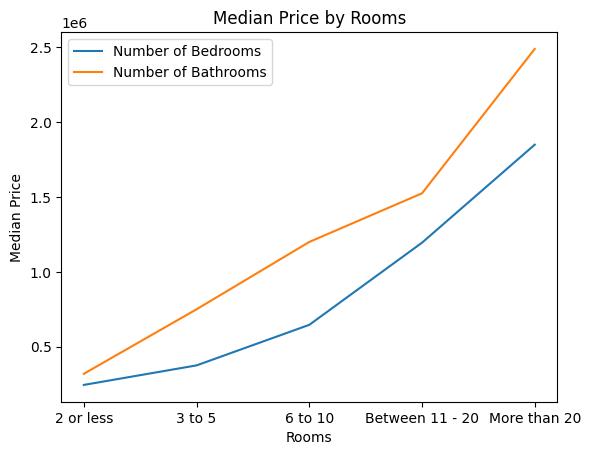

In [26]:
def categorize_number_bedrooms(bedrooms):
    categories=[]
    for bedroom_count in bedrooms:
        if bedroom_count >= 0 and bedroom_count <= 2:
            categories.append('2 or less')
        elif bedroom_count >= 3 and bedroom_count <= 5:
            categories.append('3 to 5')
        elif bedroom_count >= 6 and bedroom_count <= 10:
            categories.append('6 to 10')
        elif bedroom_count >= 11 and bedroom_count <= 20:
            categories.append('Between 11 - 20')
        else:
            categories.append('More than 20')
    return categories
    


def categorize_number_bathrooms(bathrooms):
    categories=[]
    for bathroom_count in bathrooms:
        if bathroom_count >= 0 and bathroom_count <= 2:
            categories.append('2 or less')
        elif bathroom_count >= 3 and bathroom_count <= 5:
            categories.append('3 to 5')
        elif bathroom_count >= 6 and bathroom_count <= 10:
            categories.append('6 to 10')
        elif bathroom_count >= 11 and bathroom_count <= 20:
            categories.append('Between 11 - 20')
        else:
            categories.append('More than 20')
    return categories


df['BedroomsCategory'] = categorize_number_bedrooms(df['BedroomCount'])
df['BathroomsCategory'] = categorize_number_bathrooms(df['BathroomCount'])


bedrooms=df.groupby("BedroomsCategory")['Price'].median().sort_index()
bathrooms =df.groupby("BathroomsCategory")['Price'].median().sort_index()


plt.plot(bedrooms.index, bedrooms.values)
plt.plot(bathrooms.index, bathrooms.values)

plt.xlabel('Rooms')
plt.ylabel('Median Price')
plt.title('Median Price by Rooms')
plt.legend(["Number of Bedrooms", "Number of Bathrooms"])
plt.show()


---

### Heatmap



Text(0.5, 1.0, 'Correlation Heatmap')

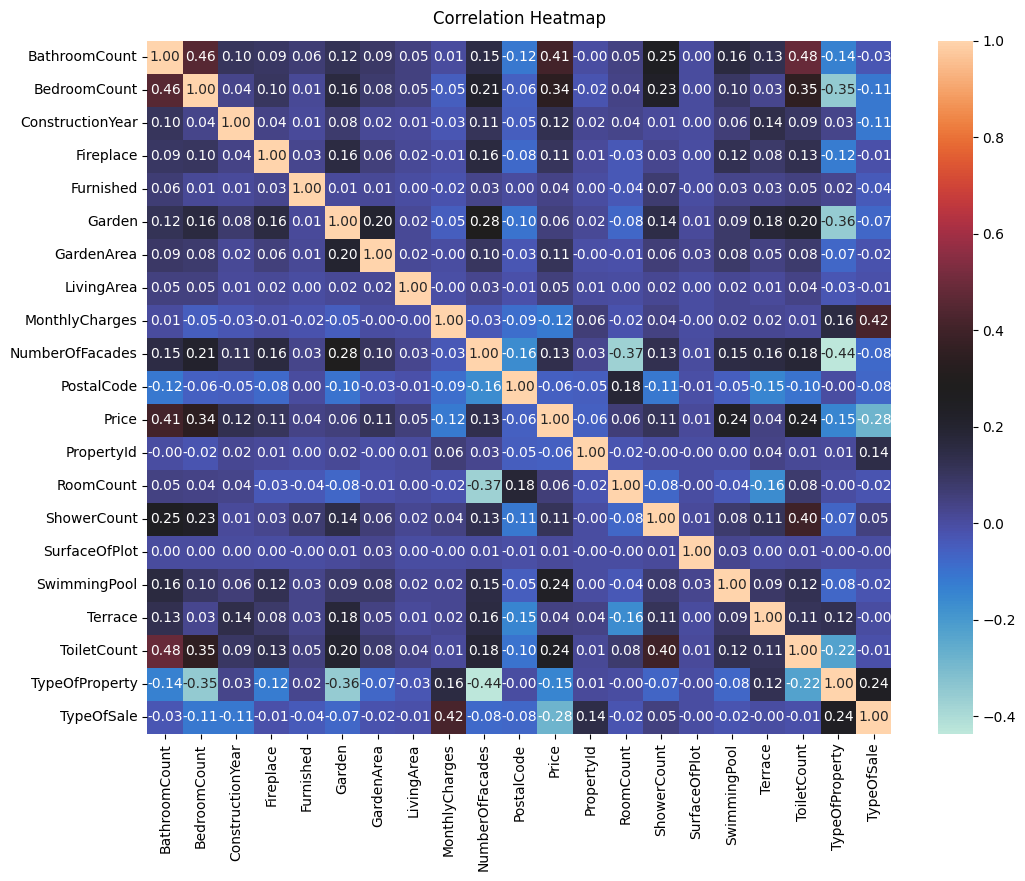

In [29]:
data = df.select_dtypes(include=['float64', 'int64'])
#dataplot = sns.heatmap(data.corr(), cmap="magma", annot=True, fmt='2g') 
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(data.corr(method='pearson'), cmap='icefire',annot=True,fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)